### 자연어 처리 리뷰활용
* konlpy를 이용한 자연어처리


In [2]:
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

### 형태소 분석기 초기화

In [3]:
hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

D:\anaconda\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:

c="안녕하세요 여러분"
kkma.nouns(c[:40])
#hannanum.nouns(c[:40])
#pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))
#pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['안녕', '여러분']

In [5]:
dbname="nmovie.db"

In [6]:
def seldb():
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql="""
        select 
        IDX,TITLE,CONTENT,POINT,TCODE
        from movie 

        """
#        where TCODE='"""+str(tcode)+"""'
#        order by IDX        
        data=cur.execute(sql).fetchall()
        xdata=[]
        ydata=[]
        i=0
        for d in data:
            xdata.append(i)
            ydata.append((d[2],d[3],d[4]))
            i+=1
            #print(d,end="\n")
        conn.commit()
        cur.close()
        return (xdata,ydata)

In [7]:
gdata=seldb()
print(gdata[1][:10])

[('스토리 내용의 재미를 좋아하는데 진짜 OOO기 영화였고 시간이 아까웠음', 4, 3), ('일본 망해라. 일본 망해라. 일본 망해라. 일본 망해라.', 1, 128), ('존윅4 언제 기다리냐 ㅠㅠㅠ', 10, 10), ('그냥 스파이더맨이라 보러간던데 역시 마블의 밝은 분위기가 재밌어요', 10, 3), ('진짜 노잼... 예고편도 재미없더니 본영화는 더 없네', 4, 5), ('발재간이 압권 ㅋㅋㅋㅋ', 7, 127), ('꼭 사극+코믹장르면 망하더라ㄷㄷ', 2, 5), ('재미있었지만, 토니 스타크의 공백이 남아있다.', 8, 3), ('단순히 막판 반전만이 이 영화의 전부라고 생각하지 마시길....', 10, 126), ('다시보고싶은 영화중 하나!', 10, 76)]


In [11]:
nt=[]

#for s in gdata[1]:
#    print(s[0])

for s in gdata[1]:
    ns=kkma.nouns(s[0])
    nt.append(ns)
print(nt)

[['스토리', '내용', '재미', '기', '영화', '시간'], ['일본', '망해'], ['존', '존윅4', '윅', '4'], ['스파이', '스파이더맨', '더', '맨', '마블', '분위기'], ['노', '노잼', '잼', '편도', '영화'], ['발재간', '압권'], ['사극', '코믹', '코믹장르', '장르', 'ㄷ', 'ㄷㄷ'], ['토', '스타크', '공백'], ['막판', '반전', '반전만이', '만이', '영화', '전부', '생각'], ['영화', '영화중', '중', '하나'], ['추천', '영화'], [], ['배우', '영화', '기대'], ['을', '과정'], ['후반부', '눈치', '진짜', '대사', '대사하나하나', '하나하나', '연기력', '하나', '하나만', '만', '소름'], ['윌', '윌스미스', '스미스', '영화'], ['조조', '웃음'], ['연기', '작품', '눈'], ['초반', '부분', '스파이', '스파이더맨', '더', '맨', '10', '10대', '대', '감정', '마블', '쿠키', '쿠키맛집', '맛', '집', '생각'], ['토', '니'], ['김래', '김래원형', '원형', '팬', '간만'], ['수렴', '스토리', '일화', '에피소드'], ['책', '책일고', '일고', '영화', '기', '최악'], ['10', '10분', '분'], ['시사회', '끝', '긴장'], ['예상', '전개', '봉', '봉준호', '준호', '감독', '내용', '19', '19세', '세', '듯'], ['토이', '토이스토리', '스토리', '4', '동안', '내', '나이', '앞', '앞자리', '자리', '3', '나', '동심'], ['마블', '몰락', '거미', '거미소년', '소년', '성장기', '퓨리', '억지', '코메디', '개연성', '연출', '영화', '한계'], ['칭찬', '분', '이것', '처음', 'ㅇ', 'ㅇㅈ', 

In [12]:
ntall=[]
for n in nt:
    ntall.extend(n)
print(ntall)    

['스토리', '내용', '재미', '기', '영화', '시간', '일본', '망해', '존', '존윅4', '윅', '4', '스파이', '스파이더맨', '더', '맨', '마블', '분위기', '노', '노잼', '잼', '편도', '영화', '발재간', '압권', '사극', '코믹', '코믹장르', '장르', 'ㄷ', 'ㄷㄷ', '토', '스타크', '공백', '막판', '반전', '반전만이', '만이', '영화', '전부', '생각', '영화', '영화중', '중', '하나', '추천', '영화', '배우', '영화', '기대', '을', '과정', '후반부', '눈치', '진짜', '대사', '대사하나하나', '하나하나', '연기력', '하나', '하나만', '만', '소름', '윌', '윌스미스', '스미스', '영화', '조조', '웃음', '연기', '작품', '눈', '초반', '부분', '스파이', '스파이더맨', '더', '맨', '10', '10대', '대', '감정', '마블', '쿠키', '쿠키맛집', '맛', '집', '생각', '토', '니', '김래', '김래원형', '원형', '팬', '간만', '수렴', '스토리', '일화', '에피소드', '책', '책일고', '일고', '영화', '기', '최악', '10', '10분', '분', '시사회', '끝', '긴장', '예상', '전개', '봉', '봉준호', '준호', '감독', '내용', '19', '19세', '세', '듯', '토이', '토이스토리', '스토리', '4', '동안', '내', '나이', '앞', '앞자리', '자리', '3', '나', '동심', '마블', '몰락', '거미', '거미소년', '소년', '성장기', '퓨리', '억지', '코메디', '개연성', '연출', '영화', '한계', '칭찬', '분', '이것', '처음', 'ㅇ', 'ㅇㅈ', 'ㅈ', '1.2', '1.2편', '편', '건', '전편', '찰떡', '기도', '설', '육갑', 

In [13]:
from collections import Counter
count = Counter(ntall)
print(count)

Counter({'영화': 588, '연기': 112, '거': 89, '잼': 81, '스토리': 76, '생각': 76, '기대': 75, '배우': 74, '수': 74, '최고': 73, '점': 71, '때': 64, '듯': 58, '평점': 56, '느낌': 54, '사람': 54, '마블': 53, '감동': 50, '처음': 49, '편': 49, '감독': 48, '나': 48, '안': 48, '2': 48, '시간': 46, '스파이': 45, '1': 45, '진짜': 44, '내': 44, '내용': 43, '재미': 43, '액션': 43, '개': 42, '번': 40, '줄': 40, '마지막': 38, '사랑': 38, '중': 36, '말': 35, '인생': 35, '맨': 34, '이것': 34, '분': 33, '정도': 33, '4': 32, '저': 32, '애': 30, '이상': 30, '김래원': 30, '김': 29, '반전': 28, '추천': 28, '3': 28, '별': 28, '하나': 27, '미': 27, '뭐': 27, '이거': 27, '마음': 27, '한국': 26, '원': 26, '토': 25, '작품': 25, '10': 25, '끝': 25, '임': 25, '년': 25, '장면': 25, '돈': 25, '남': 25, '전': 25, '노래': 25, '보고': 24, '중간': 24, '스파이더맨': 23, '더': 23, '시리즈': 23, '라': 23, '윌': 22, '리': 22, '캐릭터': 22, '눈': 21, '링': 21, '매력': 21, '디': 21, '알바': 21, '노': 20, '스미스': 20, '니': 20, '김래': 20, '건': 20, '때문': 20, '몰입': 20, '기분': 20, '자체': 20, 'ㅠ': 20, '만큼': 20, '짱': 20, '일본': 19, '소름': 19, '부분': 19, '준호': 19, '오랜만':

In [14]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

print(font_name)

Malgun Gothic


In [15]:
#plt.rcParams["font.family"] = 'Malgun Gothic'
from wordcloud import WordCloud
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()
print(c[:100])


대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [16]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 800,
    height = 800
)
w=w.generate(c)

In [17]:
w.words_
print(w)

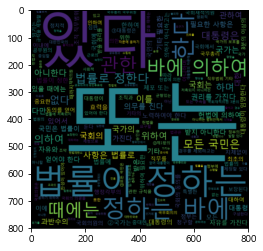

In [18]:
plt.imshow(w,interpolation='bilinear')

In [19]:
f = open("stopkr.txt", 'r')
while True:
    line = f.readline()
    if not line: break
    print(line)
f.close()

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 0: illegal multibyte sequence

In [20]:
import csv
f = open('stopkr.txt', 'r', encoding='utf-8')
rdr = csv.reader(f)
stopword=[]
for line in rdr:
    stopword.append(line[0])
f.close() 
print(stopword[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [21]:
from nltk.tokenize import word_tokenize 
w=word_tokenize(c)
